# Text Classification Assessment 

### Goal: Given a set of text movie reviews that have been labeled negative or positive

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/

## Complete the tasks in bold below!

**Task: Perform imports and load the dataset into a pandas DataFrame**
For this exercise you can load the dataset from `'../DATA/moviereviews.csv'`.

In [1]:
# CODE HERE

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r'moviereviews.csv')

In [3]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


**TASK: Check to see if there are any missing values in the dataframe.**

In [4]:
#CODE HERE
df.isna().sum()

label      0
review    35
dtype: int64

label      0
review    35
dtype: int64

**TASK: Remove any reviews that are NaN**

In [5]:
df = df.dropna()

**TASK: Check to see if any reviews are blank strings and not just NaN. Note: This means a review text could just be: "" or "  " or some other larger blank string. How would you check for this? Note: There are many ways! Once you've discovered the reviews that are blank strings, go ahead and remove them as well. [Click me for a big hint](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.isspace.html)**

In [6]:
df['review'].str.isspace().sum()

27

27

In [7]:
a = df.loc[df['review'].str.isspace()]
a

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [8]:
df  = df.drop(a.index)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


**TASK: Confirm the value counts per label:**

In [9]:
#CODE HERE
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

pos    969
neg    969
Name: label, dtype: int64

## EDA on Bag of Words

**Bonus Task: Can you figure out how to use a CountVectorizer model to get the top 20 words (that are not english stop words) per label type? Note, this is a bonus task as we did not show this in the lectures. But a quick cursory Google search should put you on the right path.  [Click me for a big hint](https://stackoverflow.com/questions/16288497/find-the-most-common-term-in-scikit-learn-classifier)**

In [10]:
neg = df.loc[df['label']=='neg']
pos = df.loc[df['label']=='pos']

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
words = vectorizer.fit_transform(neg['review'])
sum_words = words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print('Top 20 words used for Negative reviews.')
words_freq[:20]


Top 20 words used for Negative reviews.


[('film', 4063),
 ('movie', 3131),
 ('like', 1808),
 ('just', 1480),
 ('time', 1127),
 ('good', 1117),
 ('bad', 997),
 ('character', 926),
 ('story', 908),
 ('plot', 888),
 ('characters', 838),
 ('make', 813),
 ('really', 743),
 ('way', 734),
 ('little', 696),
 ('don', 683),
 ('does', 666),
 ('doesn', 648),
 ('action', 635),
 ('scene', 634)]

Top 20 words used for Negative reviews.
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
words = vectorizer.fit_transform(pos['review'])
sum_words = words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print('Top 20 words used for Positive reviews.')
words_freq[:20]


Top 20 words used for Positive reviews.


[('film', 5002),
 ('movie', 2389),
 ('like', 1721),
 ('just', 1273),
 ('story', 1199),
 ('good', 1193),
 ('time', 1175),
 ('character', 1037),
 ('life', 1032),
 ('characters', 957),
 ('way', 864),
 ('films', 851),
 ('does', 828),
 ('best', 788),
 ('people', 769),
 ('make', 764),
 ('little', 751),
 ('really', 731),
 ('man', 728),
 ('new', 702)]

Top 20 words used for Positive reviews.
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


### Training and Data

**TASK: Split the data into features and a label (X and y) and then preform a train/test split. You may use whatever settings you like. To compare your results to the solution notebook, use `test_size=0.20, random_state=101`**

In [13]:
#CODE HERE
df['label'] = pd.get_dummies(df['label'],{'neg':1,'pos':0}) 
X = df['review']
y =  df['label']

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20,  random_state = 101)

### Training a Mode

**TASK: Create a PipeLine that will both create a TF-IDF Vector out of the raw text data and fit a supervised learning model of your choice. Then fit that pipeline on the training data.**

In [15]:
#CODE HERE
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [16]:
pipe = Pipeline([('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [17]:
p = pipe.fit(X_train,y_train)
p

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

**TASK: Create a classification report and plot a confusion matrix based on the results of your PipeLine.**

In [18]:
#CODE HERE
from sklearn.metrics import classification_report

In [19]:
model = p

print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       197
           1       0.81      0.86      0.83       191

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



In [20]:
from sklearn.metrics import plot_confusion_matrix

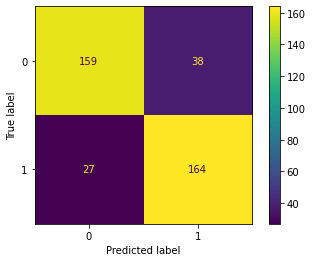

In [21]:
print(plot_confusion_matrix(model,X_test,y_test))

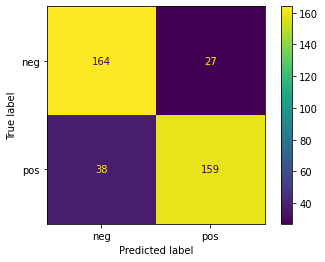

**TASK: Create a classification based on Random Forest, Gradient Boosting, ADABoost, XGBoost. Then select the one with the best performance.**

-----------------------------------------------------------------------------------------------------------------------------------------


**Random Forest**

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [23]:
pipe = Pipeline([('tfidf', TfidfVectorizer()), ('rf', RandomForestClassifier())])
model_rf = pipe.fit(X_train,y_train)

In [24]:
print(classification_report(y_test, model_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.75      0.78       197
           1       0.76      0.84      0.80       191

    accuracy                           0.79       388
   macro avg       0.79      0.79      0.79       388
weighted avg       0.79      0.79      0.79       388



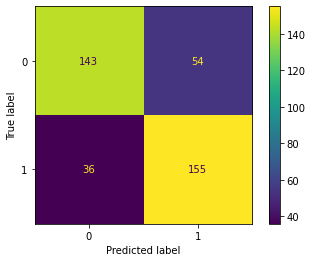

In [27]:
print(plot_confusion_matrix(model_rf,X_test,y_test))

--------------------------------------------------------------------------------------------------------------------------


**Gradient Boosting**

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

In [26]:
pipe = Pipeline([('tfidf', TfidfVectorizer()), ('gbc', GradientBoostingClassifier())])
model_gbc = pipe.fit(X_train,y_train)

In [27]:
print(classification_report(y_test, model_gbc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       197
           1       0.79      0.83      0.81       191

    accuracy                           0.81       388
   macro avg       0.81      0.81      0.81       388
weighted avg       0.81      0.81      0.81       388



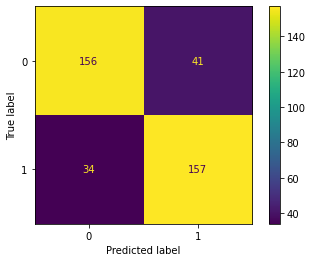

In [31]:
print(plot_confusion_matrix(model_gbc,X_test,y_test))

----------------------------------------

**ADABoost**

In [28]:
from sklearn.ensemble import AdaBoostClassifier

In [29]:
pipe = Pipeline([('tfidf', TfidfVectorizer()), ('abc', AdaBoostClassifier())])
model_abc = pipe.fit(X_train,y_train)

In [30]:
print(classification_report(y_test, model_abc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74       197
           1       0.73      0.74      0.74       191

    accuracy                           0.74       388
   macro avg       0.74      0.74      0.74       388
weighted avg       0.74      0.74      0.74       388



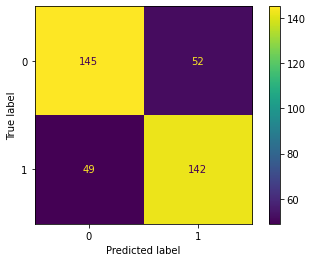

In [35]:
print(plot_confusion_matrix(model_abc,X_test,y_test))

--------------------------------------------

**XGBoost**

In [31]:
import xgboost as xgb

In [32]:
pipe = Pipeline([('tfidf', TfidfVectorizer()), ('xgb',xgb.XGBClassifier())])
model_xgb = pipe.fit(X_train,y_train)

In [33]:
print(classification_report(y_test, model_xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       197
           1       0.78      0.84      0.81       191

    accuracy                           0.80       388
   macro avg       0.80      0.80      0.80       388
weighted avg       0.80      0.80      0.80       388



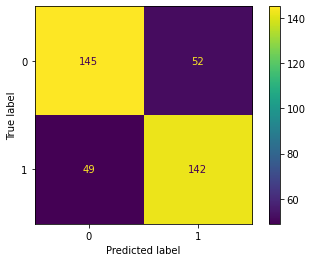

In [39]:
print(plot_confusion_matrix(model_abc,X_test,y_test))

-------

The best model (based on accuracy) is **LinearSVC**- 83%

## Great job!